In [ ]:
!unzip '/content/drive/MyDrive/datasets/gender_dataset_face.zip'

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,AveragePooling2D, Activation, BatchNormalization,ZeroPadding2D
from tensorflow.keras.utils import to_categorical,image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preprocessing

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.25)

In [8]:
train_generator = train_datagen.flow_from_directory('/content/gender_dataset_face',
                                                             target_size = (224,224),
                                                             subset = 'training',
                                                    batch_size=1173,
                                                    shuffle = True)
validation_generator = train_datagen.flow_from_directory('/content/gender_dataset_face',
                                                                  target_size = (224,224),
                                                                  subset = 'validation',
                                                         batch_size=1134,
                                                         shuffle = True)

Found 1731 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'man': 0, 'woman': 1}

In [10]:
x_train,y_train = next(train_generator)
x_test,y_test = next(validation_generator)

In [11]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1173, 224, 224, 3) (576, 224, 224, 3) (1173, 2) (576, 2)


[0. 1.]


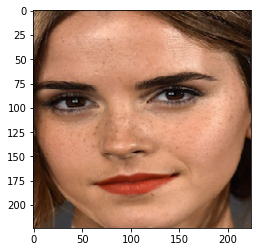

[1. 0.]


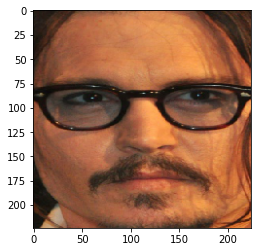

[1. 0.]


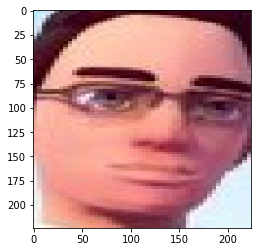

In [41]:
for i in range(0,3):
    image = x_train[i]
    label = y_train[i]
    print(label)
    plt.imshow(image)
    plt.show()

### Training

In [23]:
xception_model = tf.keras.applications.xception.Xception(input_shape = (224,224,3),weights = 'imagenet',include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [24]:
for layer in xception_model.layers:
  layer.trainable=False

In [30]:
headModel = xception_model.output
headModel = AveragePooling2D()(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(2, activation='softmax')(headModel)

model = Model(inputs=xception_model.input, outputs=headModel)

In [31]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [33]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,epochs=50)

Epoch 1/50
37/37 [==============================] - 13s 250ms/step - loss: 0.2565 - accuracy: 0.9088 - val_loss: 0.1251 - val_accuracy: 0.9653
Epoch 2/50
37/37 [==============================] - 7s 188ms/step - loss: 0.1278 - accuracy: 0.9582 - val_loss: 0.1022 - val_accuracy: 0.9653
Epoch 3/50
37/37 [==============================] - 7s 189ms/step - loss: 0.0860 - accuracy: 0.9719 - val_loss: 0.1101 - val_accuracy: 0.9531
Epoch 4/50
37/37 [==============================] - 7s 199ms/step - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.1007 - val_accuracy: 0.9740
Epoch 5/50
37/37 [==============================] - 7s 192ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0913 - val_accuracy: 0.9601
Epoch 6/50
37/37 [==============================] - 7s 204ms/step - loss: 0.0372 - accuracy: 0.9932 - val_loss: 0.0881 - val_accuracy: 0.9722
Epoch 7/50
37/37 [==============================] - 7s 196ms/step - loss: 0.0322 - accuracy: 0.9949 - val_loss: 0.0886 - val_accuracy: 0.9583
Epoch

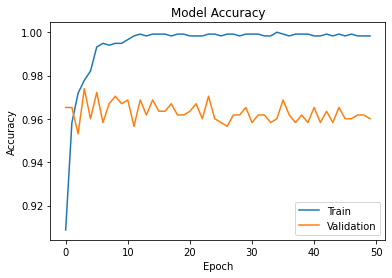

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [36]:
model.save('/content/weights.h5')

In [37]:
pred = model.predict(x_test)

18/18 [==============================] - 3s 125ms/step


In [38]:
acc = [np.argmax(i) for i in pred]
y_test_pred = [np.argmax(i) for i in y_test]

In [39]:
accuracy_score(y_test_pred,acc)

0.9600694444444444

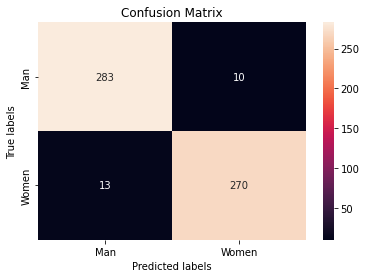

In [40]:
cm1 = confusion_matrix(y_test_pred,acc)
 

ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Man', 'Women']); ax.yaxis.set_ticklabels(['Man', 'Women']);

In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [ ]:
pip install cvlib

In [3]:
from keras.utils import get_file
import numpy as np
import cv2
import os
import cvlib as cv

In [4]:
model = load_model('my_model_weights1.h5')

In [5]:
webcam = cv2.VideoCapture(0)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()

Could not open webcam


In [5]:
classes = ['man','women']

In [ ]:
while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()
    face, confidence = cv.detect_face(frame)
    print(face)
    print(confidence)

In [ ]:
for idx, f in enumerate(face):      
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        face_crop = cv2.resize(face_crop, (256,256))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        conf = model.predict(face_crop)[0]
        print(conf)
        print(classes)

        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    cv2.imshow("gender detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()